In [1]:
import numpy as np
import pandas as pd
import io

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('C:/KAGGLE/Sale_price_prediction/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


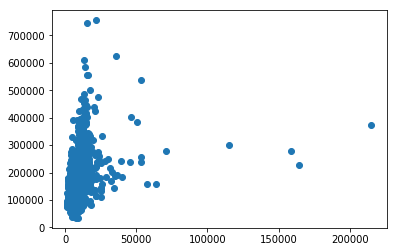

In [4]:
plt.scatter(df['LotArea'],df['SalePrice'])
plt.show()

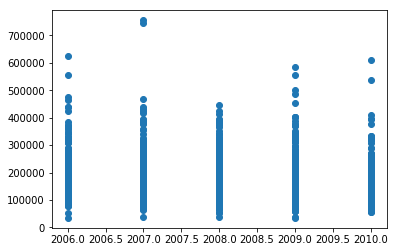

In [5]:
plt.scatter(df['YrSold'],df['SalePrice'])

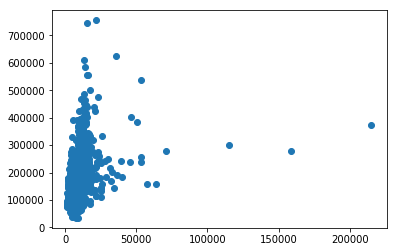

In [6]:
a= df['Street']=='Pave'
df1=df[a]
plt.scatter(df1['LotArea'],df1['SalePrice'])

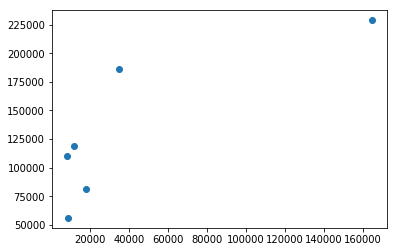

In [7]:
b= df['Street']=='Grvl'
df2=df[b]
plt.scatter(df2['LotArea'],df2['SalePrice'])

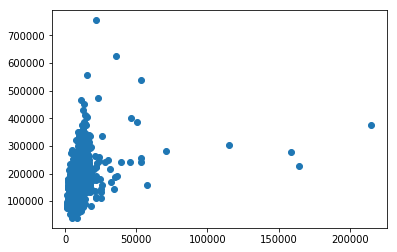

In [8]:
c= df['SaleCondition']=='Normal' 
df3= df[c]
plt.scatter(df3['LotArea'],df3['SalePrice'])

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [33]:
from sklearn.linear_model import Ridge
#x= df.drop(['SalePrice','MSZoning','LotFrontage','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','HouseStyle','Condition2','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','SaleCondition','SaleType','GarageType','Fireplaces','MiscFeature','Fence','PoolQC','PavedDrive','GarageCond','GarageQual','GarageFinish','Functional','KitchenQual','Electrical','CentralAir','HeatingQC','Heating','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','Foundation','ExterCond','ExterQual','MasVnrType'],axis=1)
df1= df._get_numeric_data()

x= df1.drop(['SalePrice'],axis=1)
x = x.fillna(method='ffill')
y= df['SalePrice']
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.46)
clf= Ridge()
#clf.fit(x_train,y_train)
x.shape

(1460, 37)

In [34]:
clf.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
y_pred=clf.predict(x_test)

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score(y_test,y_pred)

0.7950686836599932

In [38]:
test= pd.read_csv('C:/KAGGLE/Sale_price_prediction/test.csv')
test.head()
len(test)

1459

In [39]:
ndf= test._get_numeric_data()
x1 = ndf.fillna(method='ffill')
x1.shape

(1459, 37)

In [40]:
print(len(x1))
test['SalePrice']= clf.predict(x1)
test['SalePrice']

1459


0       100619.184080
1       107471.954568
2       170628.983010
3       198366.817508
4       199574.516306
5       182858.177844
6       200157.640032
7       175022.822119
8       206523.197015
9       115405.714493
10      209806.501481
11      119379.996949
12       99375.929902
13      153056.270438
14      120474.714326
15      314730.291187
16      244611.280042
17      293604.126112
18      275696.160035
19      393064.883898
20      292341.711245
21      219344.365953
22      175199.907746
23      179176.500541
24      206677.450060
25      213649.706614
26      279828.989716
27      257887.643002
28      177540.808419
29      231223.666981
            ...      
1429     56805.706082
1430    144261.157916
1431     42240.041443
1432     68591.250885
1433     45692.200366
1434    298460.189860
1435    268208.957816
1436    204845.537445
1437    161367.444113
1438    232819.271860
1439    160899.774654
1440    220022.183446
1441    199737.779454
1442    317579.377677
1443    33

In [41]:
test.to_csv('C:/KAGGLE/Sale_price_prediction/submission.csv')